In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [4]:
job_data = pd.read_csv(r"C:\Users\krishna Chaitanya\OneDrive\Desktop\JobScamAlert\Job_Scam_Alert.csv.zip")

In [5]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
job_data.shape

(17880, 18)

In [7]:
#data cleaning

In [8]:
job_data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for colu in columns:
    del job_data[colu]

In [10]:
job_data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
#ploting

In [12]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
job_data.fillna(' ', inplace=True)

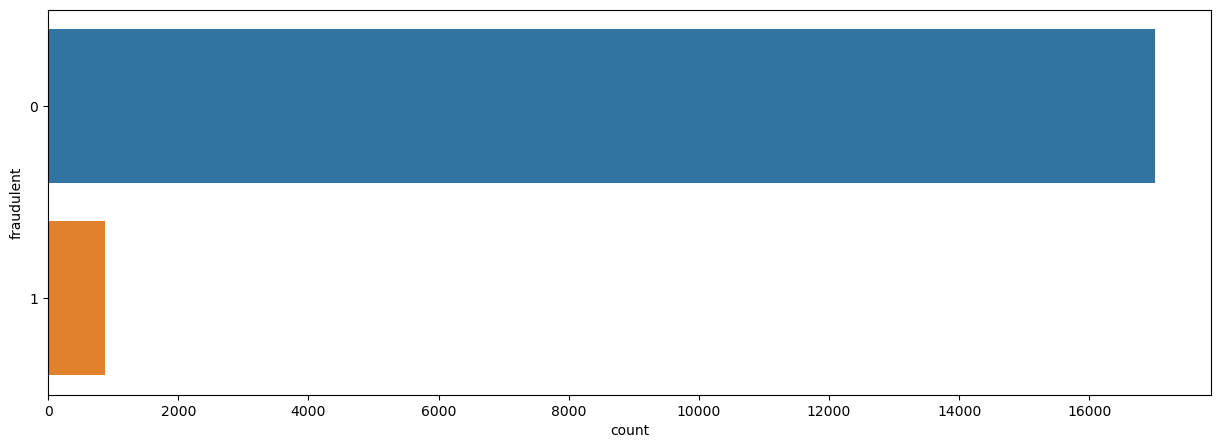

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=job_data)
plt.show()

In [14]:
job_data.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [15]:
exp=dict(job_data.required_experience.value_counts())
del exp[' ']

In [16]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

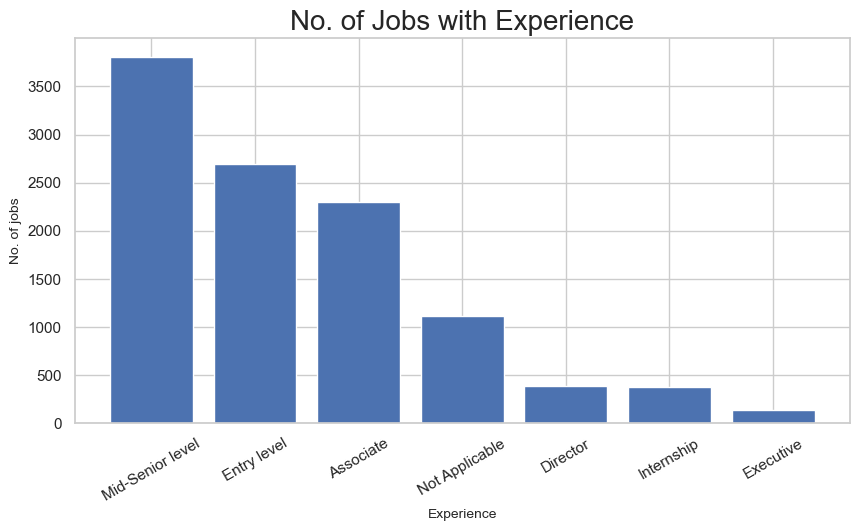

In [17]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with Experience', size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()

In [18]:
def split(location):
    l=location.split(",")
    return l[0]
job_data['country']=job_data.location.apply(split)

In [19]:
job_data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [20]:
countr= dict(job_data.country.value_counts()[:14])
del countr[' ']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

Text(0.5, 0, 'Countries')

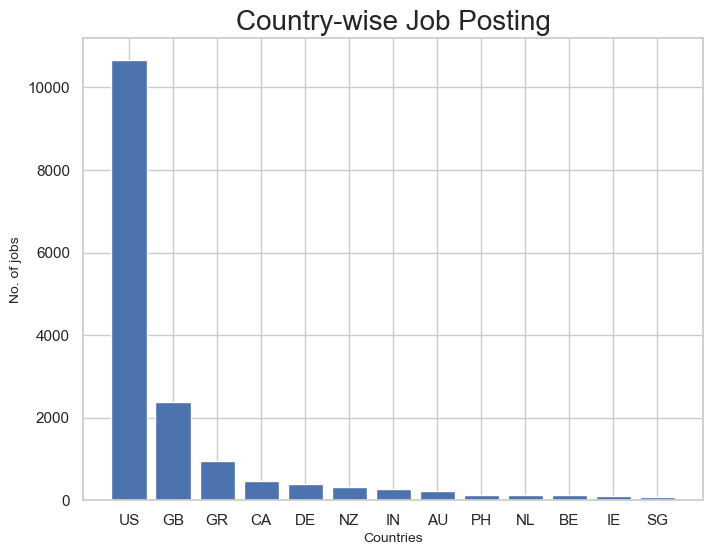

In [21]:
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [22]:
edu=dict(job_data.required_education.value_counts()[:7])
del edu[' ']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'Education')

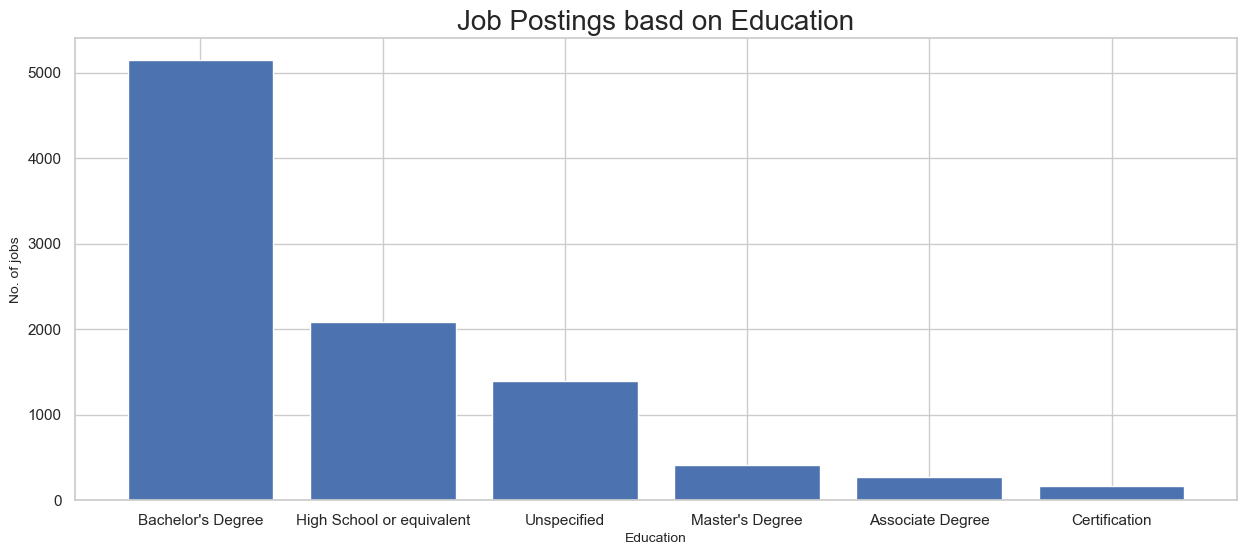

In [23]:
plt.figure(figsize=(15,6))
plt.title('Job Postings basd on Education', size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Education', size=10) 

In [24]:
print(job_data[job_data.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [25]:
print(job_data[job_data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [26]:
job_data['text']=job_data['title']+' '+job_data['company_profile']+' '+job_data['description']+' '+job_data['requirements']+' '+job_data['benefits']
del job_data['title']
del job_data['location'] 
del job_data['department']
del job_data['company_profile']
del job_data['description']
del job_data['requirements']
del job_data['benefits']
del job_data['required_experience']
del job_data['required_education']
del job_data['industry']
del job_data['function']
del job_data['country']

In [27]:
job_data.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [28]:
fraudjobs_text = job_data[job_data.fraudulent==1].text 
realjobs_text = job_data[job_data.fraudulent==0].text

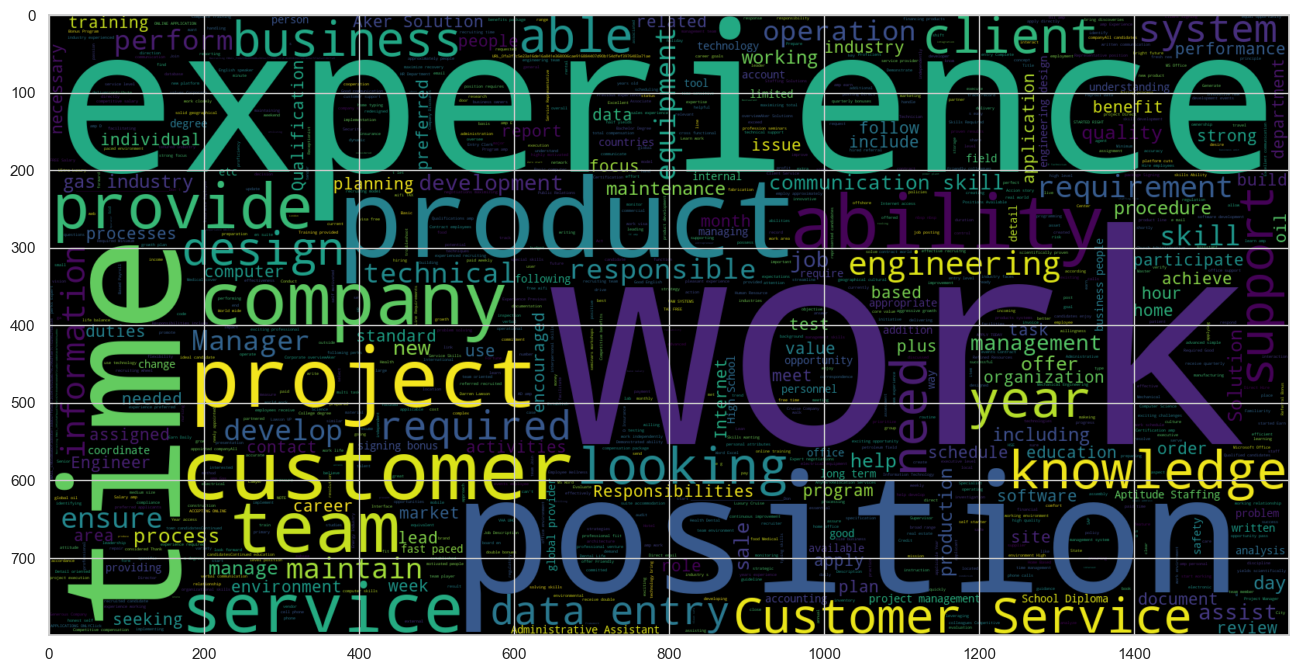

In [29]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000 , width = 1600 , height = 800 ,  stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

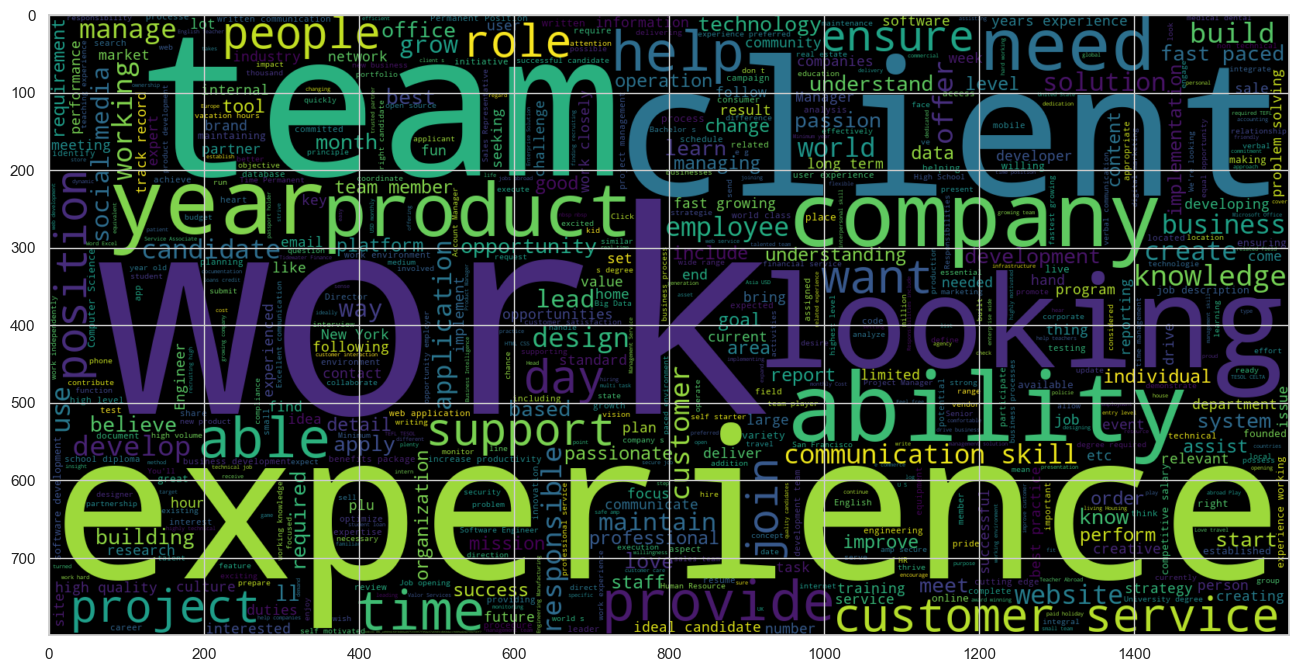

In [30]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000 , width = 1600 , height = 800 ,  stopwords = STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

In [31]:
!pip install spacy && python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 259.2 kB/s eta 0:00:50
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 327.3 kB/s eta 0:00:39
      -------------------------------------- 0.2/12.8 MB 615.9 kB/s eta 0:00:21
     --- ------------------------------------ 1.0/12.8 MB 3.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 4.5 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 7.9 MB/s eta 

In [32]:
# Load the spacy model
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation

# Initialize the parser
parser = English()

def spacy_tokenizer(sentence):
    # Create spacy tokens
    mytokens = parser(sentence)

    # Lemmatize and convert to lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]

    # Remove stop words and punctuations
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

    return mytokens

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    return text.strip().lower()

In [33]:
job_data['text'] = job_data['text'].apply(clean_text)

In [34]:
cv = TfidfVectorizer(max_features=100)

# Fit and transform the text data
x = cv.fit_transform(job_data['text'])

# Convert to DataFrame using the updated method
job_data1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

# Drop the original 'text' column from job_data
job_data.drop(["text"], axis=1, inplace=True)

# Concatenate the new DataFrame with the original job_data
main_df = pd.concat([job_data1, job_data], axis=1)

In [35]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


In [36]:
Y = main_df.iloc[:,-1]

X = main_df.iloc[:,:-1]

X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3)

print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


In [37]:
#random forst 

In [38]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")
model=rfc.fit(X_train,y_train)

In [39]:
print(X_test)

        ability     about       all      also       amp        an       and  \
5886   0.108372  0.000000  0.000000  0.000000  0.000000  0.000000  0.723146   
14690  0.000000  0.046491  0.034942  0.000000  0.082508  0.029391  0.346166   
17307  0.000000  0.137899  0.034548  0.000000  0.000000  0.029059  0.387897   
7013   0.000000  0.000000  0.111887  0.000000  0.000000  0.031370  0.394114   
12007  0.000000  0.000000  0.000000  0.000000  0.569288  0.000000  0.212309   
...         ...       ...       ...       ...       ...       ...       ...   
13102  0.000000  0.000000  0.000000  0.000000  0.255761  0.182214  0.000000   
16139  0.000000  0.069953  0.078864  0.036085  0.062073  0.000000  0.381968   
13112  0.000000  0.132101  0.000000  0.000000  0.000000  0.125270  0.278692   
17022  0.041695  0.044839  0.168503  0.000000  0.000000  0.085040  0.534185   
1533   0.050140  0.107842  0.040527  0.000000  0.000000  0.102265  0.508559   

            are        as        at  ...      well 

In [40]:
pred = rfc.predict(X_test) 
score = accuracy_score(y_test, pred)
score

0.9684936614466816

In [41]:
print("Classification Report\n")
print(classification_report(y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5098
           1       1.00      0.36      0.53       266

    accuracy                           0.97      5364
   macro avg       0.98      0.68      0.76      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix

[[5098    0]
 [ 169   97]]


In [42]:
#SVM

In [43]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Assuming your data is already split into X_train, X_test, y_train, y_test

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels as well

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict with the SVM model
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print(f'SVM Model Accuracy: {svm_accuracy}')
print(f'SVM Classification Report:\n{svm_classification_report}')


SVM Model Accuracy: 0.9504101416853095
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5098
           1       0.00      0.00      0.00       266

    accuracy                           0.95      5364
   macro avg       0.48      0.50      0.49      5364
weighted avg       0.90      0.95      0.93      5364



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import joblib

# Assuming 'rfc' is your Random Forest model and 'svm_model' is your SVM model
joblib.dump(rfc, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
print("Models saved successfully.")


Models saved successfully.
